<a href="https://colab.research.google.com/github/roshan-karkera/Face-Liveness-Detection/blob/main/Face_Liveness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!cp -r "/content/gdrive/MyDrive/final_antispoofing.zip" "/content"

In [6]:
import zipfile
archive = zipfile.ZipFile('/content/final_antispoofing.zip')
archive.extractall('/content')

##Data Preprocessing

###Four Steps

####Step 1: Create new directory structure for the datasets

####Step 2: Copying images into new directory structure

####Step 3: Dataset Exploration

####Step 4: Dataset Visualization

###Step 1 : Original v/s New Directory Structure

In [7]:
from IPython import display
print("Original Vs New Dataset Structure")
display.Image('original vs new_dataset.png')

Original Vs New Dataset Structure


In [8]:
dataset_dir = '/content/final_antispoofing'
train_dataset_dir = '/content/final_antispoofing/train'
test_dataset_dir = '/content/final_antispoofing/test'


In [11]:
train_dir='/content/antispoofing_dataset/train'
test_dir = '/content/antispoofing_dataset/test'

####Step 2

In [12]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [14]:
def train_test_splits(data_directory):
  for split_type in os.listdir(data_directory):
    path_to_split_type = os.path.join(data_directory,split_type)
    for category in os.listdir(path_to_split_type):
      path_to_category = os.path.join(path_to_split_type,category)
      for subject in os.listdir(path_to_category):
        path_to_subject = os.path.join(path_to_category,subject)
        for img in os.listdir(path_to_subject):
          if split_type == 'train':
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(train_dir,category,img))
          else:
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(test_dir,category,img))

In [15]:
train_test_splits(data_directory=dataset_dir)

####Step 3

####Dataset Exploration

In [16]:
categories = ['real','spoof']


In [17]:
print("---------------------Exploring Training Datasets--------------------")
for category in categories:
  path = os.path.join(train_dir,category)
  if category == 'real':
    r1 = len(os.listdir(path))
  else:
    s1 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in training directory".format(r1+s1))

print("-----------------------Exploring Testing Datasets-------------------------")
for category in categories:
  path = os.path.join(test_dir,category)
  if category == 'real':
    r2 = len(os.listdir(path))
  else:
    s2 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in testing directory".format(r2+s2))

---------------------Exploring Training Datasets--------------------
There are 2102 images in real directory
There are 2118 images in spoof directory
There are 4220 total images in training directory
-----------------------Exploring Testing Datasets-------------------------
There are 477 images in real directory
There are 474 images in spoof directory
There are 951 total images in testing directory


####Step 4 : Dataset Visualization

In [18]:
def get_images(data_dir,number_of_samples):
  image_path = []
  for category in categories:
    path = os.path.join(data_dir,category)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [19]:
def visualize_dataset(image_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(image_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.xlabel(image_path[i-1].split('/')[-2])
  plt.show()

In [21]:
training_image_path = get_images(data_dir= train_dir,number_of_samples=25)
print(training_image_path)
print(len(training_image_path))

['/content/antispoofing_dataset/train/real/ghfdtrdtfyh26.jpg', '/content/antispoofing_dataset/train/real/samir ale gurung36.jpg', '/content/antispoofing_dataset/train/real/WIN_20201110_10_12_22_Probrightness1.13.jpg', '/content/antispoofing_dataset/train/real/received_668474330505353.jpg', '/content/antispoofing_dataset/train/real/WIN_20201110_13_23_32_Pro (2).jpg', '/content/antispoofing_dataset/train/real/WIN_20201110_13_24_06_Prohr_flipbrightness0.68.jpg', '/content/antispoofing_dataset/train/real/None48.jpg', '/content/antispoofing_dataset/train/real/20201110_144919hr_flip.jpg', '/content/antispoofing_dataset/train/real/samir ale gurung44.jpg', '/content/antispoofing_dataset/train/real/20201110_113536hr_flip.jpg', '/content/antispoofing_dataset/train/real/jkhjhj44.jpg', '/content/antispoofing_dataset/train/real/Shikshya Gautam40brightness1.13.jpg', '/content/antispoofing_dataset/train/real/Rijan Ale4.jpg', '/content/antispoofing_dataset/train/real/dfgyhjnmk43.jpg', '/content/antisp

####Training Dataset Visualization

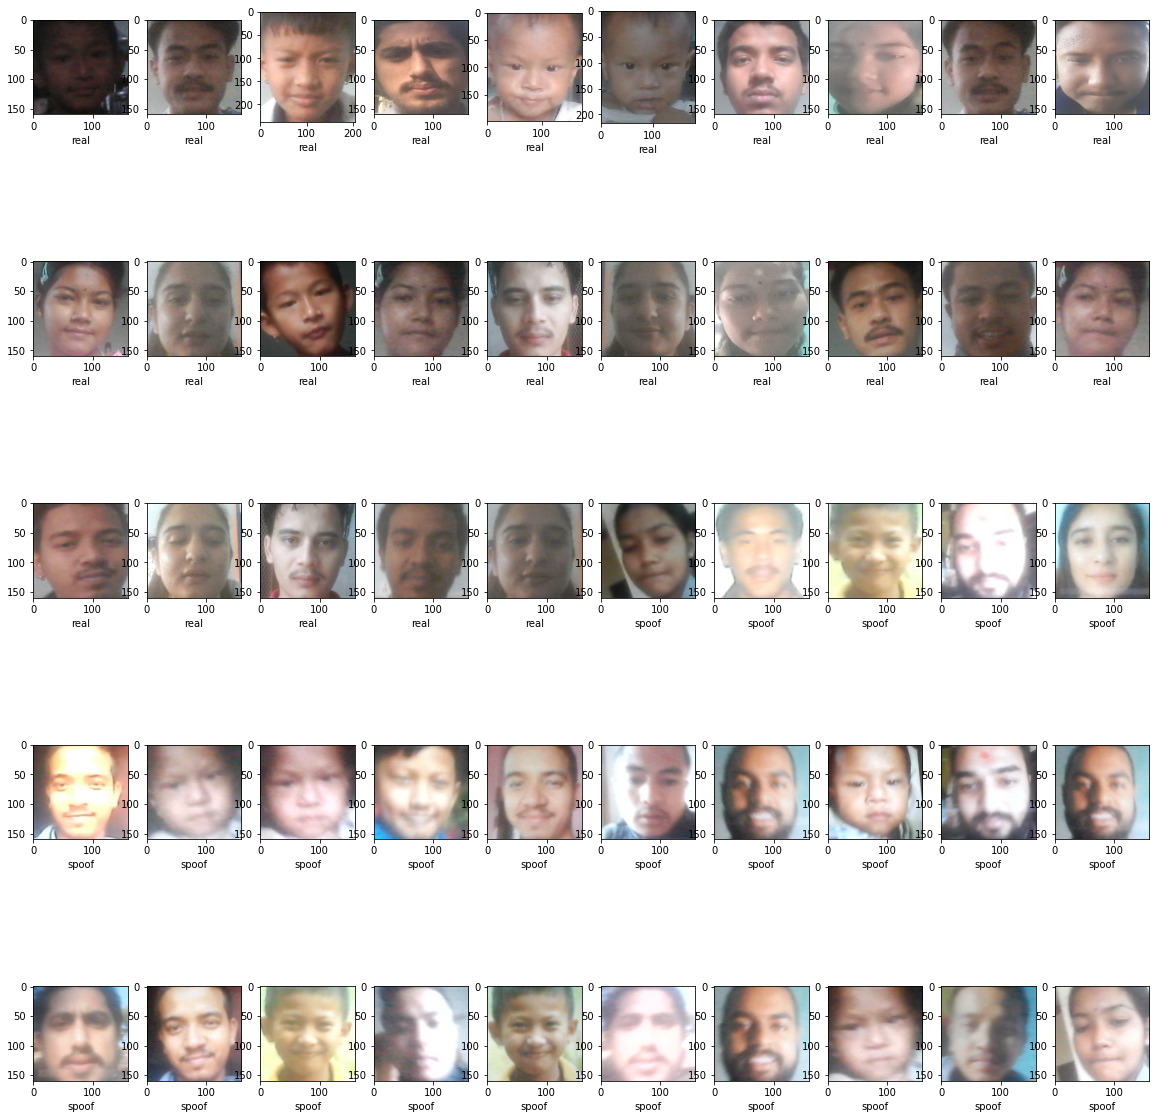

In [22]:
visualize_dataset(image_path=training_image_path,rows=5,cols=10)

####Testing Dataset Visualization

In [23]:
testing_image_path = get_images(data_dir= test_dir,number_of_samples=25)
print(testing_image_path)
print(len(testing_image_path))

['/content/antispoofing_dataset/test/real/Sumit tamang20.jpg', '/content/antispoofing_dataset/test/real/Sudeep Subedi25hr_flip.jpg', '/content/antispoofing_dataset/test/real/WIN_20201110_13_22_58_Prohr_flipbrightness0.77.jpg', '/content/antispoofing_dataset/test/real/WIN_20201110_13_23_35_Prohr_flip.jpg', '/content/antispoofing_dataset/test/real/Shikshya Gautam1brightness1.32.jpg', '/content/antispoofing_dataset/test/real/WIN_20201110_10_06_20_Prohr_flip.jpg', '/content/antispoofing_dataset/test/real/received_287176079397654.jpg', '/content/antispoofing_dataset/test/real/ghfdtrdtfyh46.jpg', '/content/antispoofing_dataset/test/real/jfdhfjhsdjf24.jpg', '/content/antispoofing_dataset/test/real/fjdkjk23.jpg', '/content/antispoofing_dataset/test/real/WIN_20201119_10_49_00_Prohr_flip.jpg', '/content/antispoofing_dataset/test/real/Shikshya Gautam28.jpg', '/content/antispoofing_dataset/test/real/Shikshya Gautam42hr_flipbrightness1.26.jpg', '/content/antispoofing_dataset/test/real/Samir tamang2

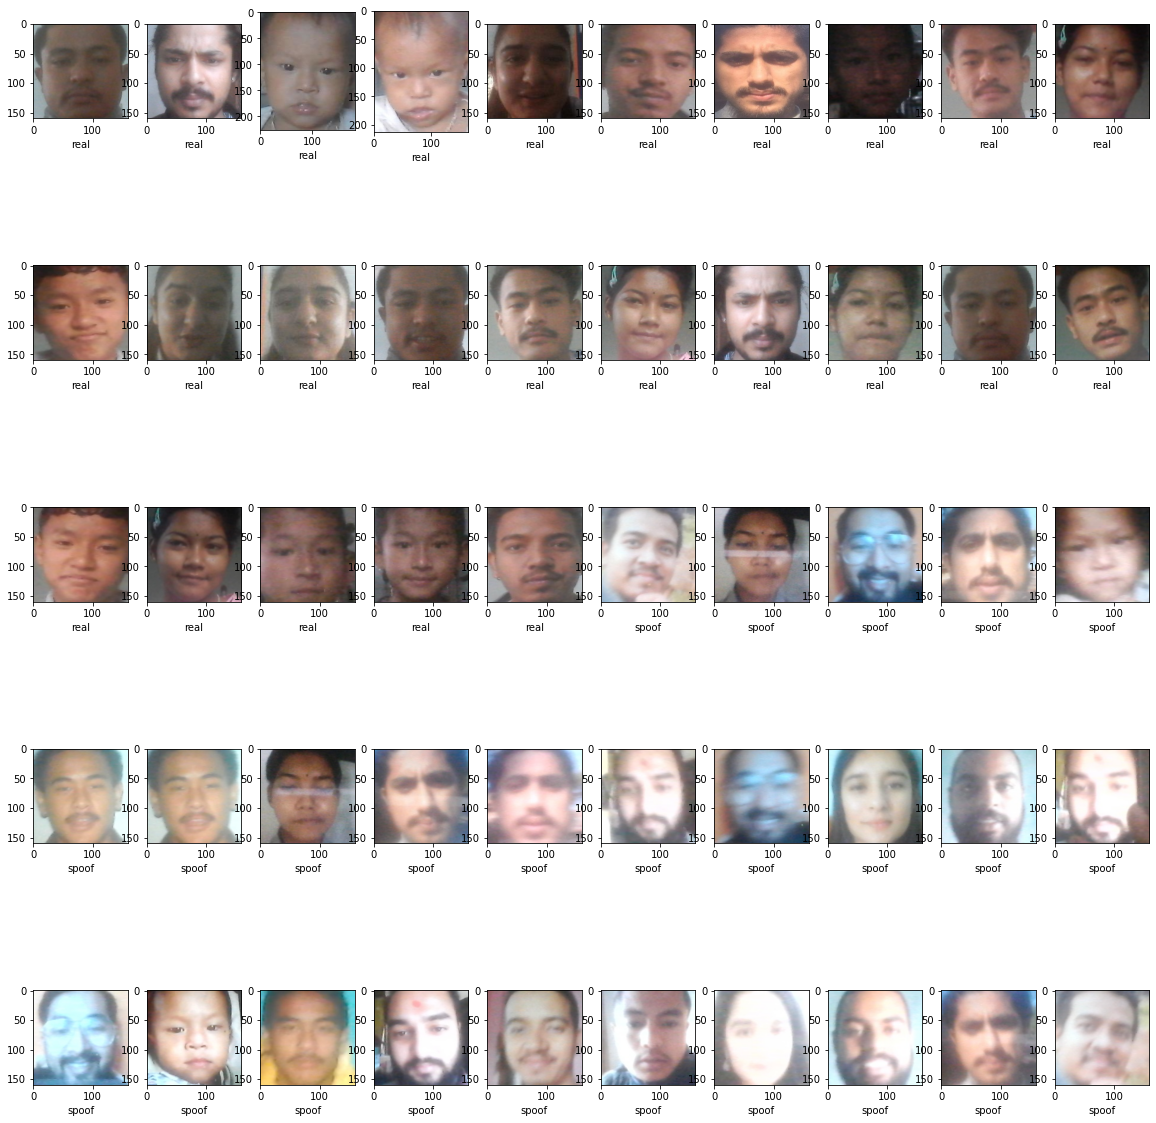

In [24]:
visualize_dataset(image_path=testing_image_path,rows=5,cols=10)

###Model Preparation

###Steps in Model Preparation

1. Choosing Framework and importing necessary libraries

2. Load datasets and Perform image augmentations

3. Model Selection

4. Compiling our model

5. Setting our model checkpoints

####Step 1: Keras Framework

In [26]:
from keras.layers import Dense,Dropout,Input,Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import model_from_json
import json

####Step 2

In [28]:
train_datagen = ImageDataGenerator(brightness_range=(0.8,1.2),rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,fill_mode='nearest',shear_range=0.2,zoom_range=0.3,rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [29]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25,shuffle=True)

Found 4220 images belonging to 2 classes.


In [30]:
valid_generator = valid_datagen.flow_from_directory(test_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25)

Found 951 images belonging to 2 classes.


####Step 3:

####Model Selection and Transfer Learning

In [31]:
mobilenet = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(160,160,3)))

9420800/9406464 [==============================] - 0s 0us/step


In [32]:
mobilenet.trainable = False

In [34]:
output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

In [35]:
model = Model(inputs = mobilenet.input,outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

####Step 4:

####Compiling the models

In [36]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

####Step 4:

####Setting our model checkpoints

In [39]:
model_checkpoint = ModelCheckpoint('./model_weights/finalyearproject_antispoofing_model_{epoch:02d}-{val_accuracy:.6f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)

In [40]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator, 
    validation_steps = valid_generator.samples // 25,
    epochs = 100,
    callbacks=[model_checkpoint])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
168/168 [==============================] - 101s 448ms/step - loss: 1.0030 - accuracy: 0.5133 - val_loss: 0.8211 - val_accuracy: 0.5305

Epoch 00001: val_loss improved from inf to 0.82107, saving model to ./model_weights/finalyearproject_antispoofing_model_01-0.530526.h5
Epoch 2/100
168/168 [==============================] - 72s 427ms/step - loss: 0.8297 - accuracy: 0.5638 - val_loss: 0.6920 - val_accuracy: 0.6179

Epoch 00002: val_loss improved from 0.82107 to 0.69204, saving model to ./model_weights/finalyearproject_antispoofing_model_02-0.617895.h5
Epoch 3/100
168/168 [==============================] - 71s 420ms/step - loss: 0.7595 - accuracy: 0.5830 - val_loss: 0.6068 - val_accuracy: 0.6958

Epoch 00003: val_loss improved from 0.69204 to 0.60682, saving model to ./model_weights/finalyearproject_antispoofing_model_03-0.695789.h5
Epoch 4/100
168/168 [==============================] - 71s 420ms/step - loss: 0.6621 - accuracy: 0.6485 - val_loss: 0.5495 - val_accuracy: 0.7368

In [42]:
# serialize model to JSON
model_json = model.to_json()
with open("finalyearproject_antispoofing_model_mobilenet.json", "w") as json_file:
    json_file.write(model_json)

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


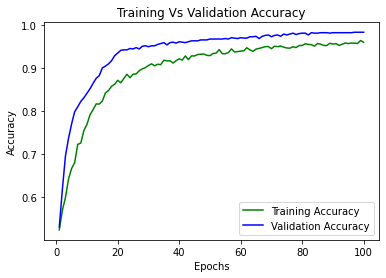

In [43]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

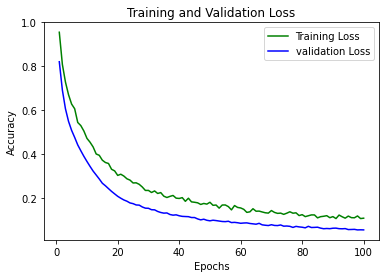

In [44]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
from keras.preprocessing import image
import numpy as np
def check_fakes(path,category_type):
  predictor = {}
  path= os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(160,160))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [48]:
check_fakes(test_dir,categories[1])

{'real': 10, 'spoof': 464}

In [54]:
check_fakes(test_dir, categories[0])

{'real': 472, 'spoof': 5}